In [4]:
import numpy as np
import pandas
import keras
from matplotlib import pyplot as plt
from sklearn import cross_validation
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
%matplotlib inline
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 24

In [5]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [6]:
# load dataset
dataframe = pandas.read_csv("glass.data.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:10].astype(float)
Y = dataset[:,10]
columnNames = ['Id','RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'] 
data = pandas.read_csv("glass.data.txt",names = columnNames, header = None)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data.loc[:, data.columns != 'Type of glass'], data['Type of glass'], 
test_size=0.25)

In [7]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [8]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=10, activation='relu'))
	model.add(Dense(9, activation='relu'))
	model.add(Dense(8, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [9]:
model = baseline_model()
Y_train_k = keras.utils.np_utils.to_categorical(y_train)
Y_test_k = keras.utils.np_utils.to_categorical(y_test)
H = model.fit(X_train, Y_train_k, batch_size=5, epochs=100, verbose=1, validation_data=(X_test, Y_test_k))

Train on 160 samples, validate on 54 samples
Epoch 1/100
160/160 [==============================] - 1s 4ms/step - loss: 5.4045 - acc: 0.3375 - val_loss: 3.5383 - val_acc: 0.5000
Epoch 2/100
160/160 [==============================] - 0s 647us/step - loss: 4.5632 - acc: 0.5563 - val_loss: 3.2708 - val_acc: 0.7593
Epoch 3/100
160/160 [==============================] - 0s 860us/step - loss: 4.4329 - acc: 0.6313 - val_loss: 3.1778 - val_acc: 0.7963
Epoch 4/100
160/160 [==============================] - 0s 869us/step - loss: 4.3814 - acc: 0.6313 - val_loss: 3.1232 - val_acc: 0.8148
Epoch 5/100
160/160 [==============================] - 0s 926us/step - loss: 4.3686 - acc: 0.6313 - val_loss: 3.1080 - val_acc: 0.8148
Epoch 6/100
160/160 [==============================] - 0s 886us/step - loss: 4.3189 - acc: 0.7063 - val_loss: 3.0950 - val_acc: 0.8148
Epoch 7/100
160/160 [==============================] - 0s 660us/step - loss: 4.2974 - acc: 0.7000 - val_loss: 3.0869 - val_acc: 0.8148
Epoch 8/100


160/160 [==============================] - 0s 566us/step - loss: 4.1968 - acc: 0.7375 - val_loss: 3.0032 - val_acc: 0.8148
Epoch 61/100
160/160 [==============================] - 0s 544us/step - loss: 4.1939 - acc: 0.7313 - val_loss: 3.0155 - val_acc: 0.8148
Epoch 62/100
160/160 [==============================] - 0s 627us/step - loss: 4.2195 - acc: 0.6938 - val_loss: 3.0016 - val_acc: 0.8148
Epoch 63/100
160/160 [==============================] - 0s 564us/step - loss: 4.1964 - acc: 0.7375 - val_loss: 3.0016 - val_acc: 0.8148
Epoch 64/100
160/160 [==============================] - 0s 564us/step - loss: 4.1979 - acc: 0.7250 - val_loss: 3.0093 - val_acc: 0.8148
Epoch 65/100
160/160 [==============================] - 0s 591us/step - loss: 4.2011 - acc: 0.7188 - val_loss: 3.0007 - val_acc: 0.8148
Epoch 66/100
160/160 [==============================] - 0s 577us/step - loss: 4.2248 - acc: 0.6938 - val_loss: 3.0055 - val_acc: 0.8148
Epoch 67/100
160/160 [==============================] - 0s 77

In [11]:
scores = model.evaluate(X_train, Y_train_k)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

160/160 [==============================] - 0s 102us/step

acc: 72.50%


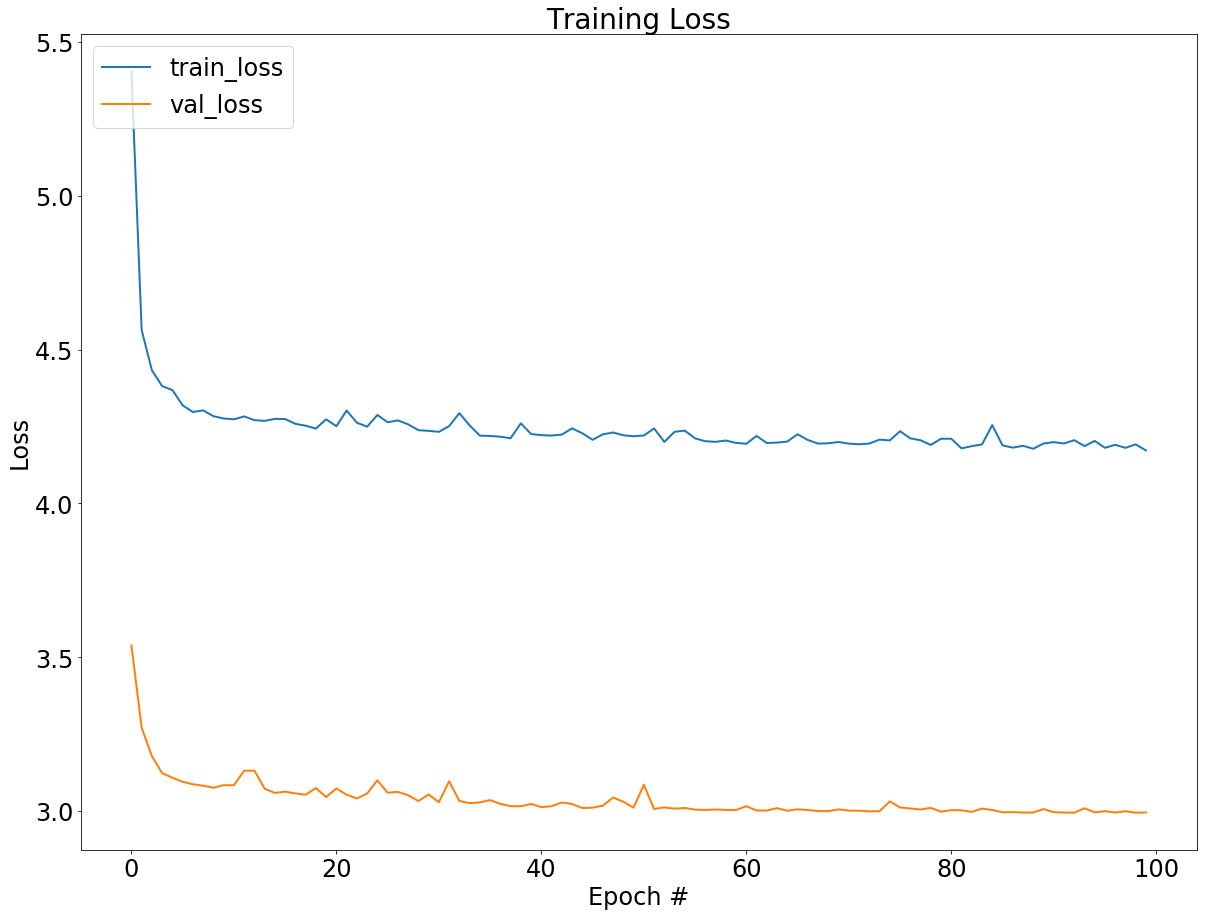

In [15]:
plt.figure(figsize=(20, 15))
N = 100
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")

plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper left")
plt.show()

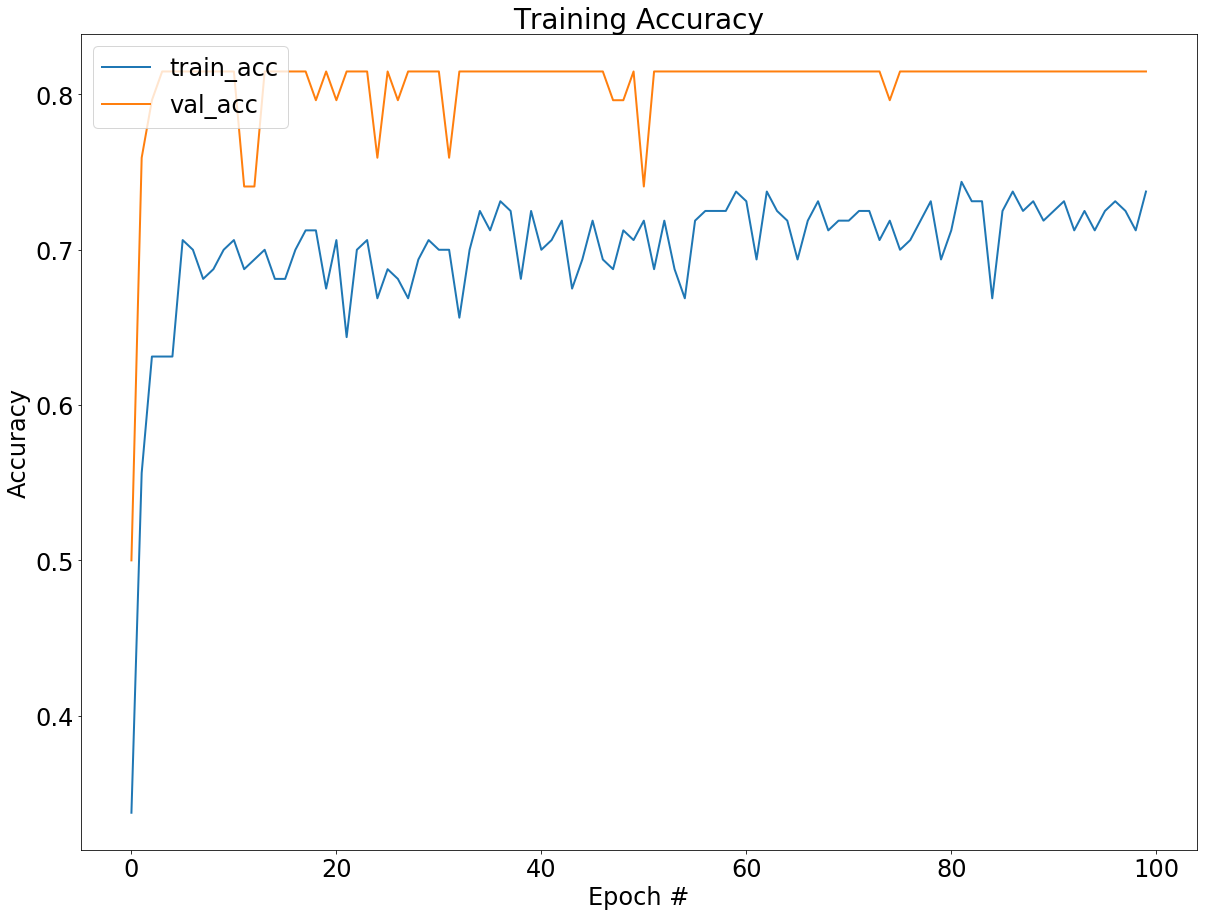

In [16]:
plt.figure(figsize=(20, 15))
N = 100
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")

plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.show()

In [17]:
def get_noisy_x(X_train, stddev):

    noise = np.random.normal(0, stddev / 100.0)
    noisy_X = X_train * (1 + noise)
    return noisy_X

In [18]:
noises = [x for x in range(0, 110, 20)]
histories = []

In [20]:
for noise in noises:
    print(noise)
    histories.append(model.fit(get_noisy_x(X_train, stddev=noise), Y_train_k, batch_size=5, epochs=100, verbose=1, validation_data=(X_test, Y_test_k)))

0
Train on 160 samples, validate on 54 samples
Epoch 1/100
160/160 [==============================] - 0s 736us/step - loss: 4.1849 - acc: 0.7250 - val_loss: 2.9947 - val_acc: 0.8148
Epoch 2/100
160/160 [==============================] - 0s 644us/step - loss: 4.1802 - acc: 0.7313 - val_loss: 2.9951 - val_acc: 0.8148
Epoch 3/100
160/160 [==============================] - 0s 628us/step - loss: 4.1739 - acc: 0.7313 - val_loss: 2.9973 - val_acc: 0.8148
Epoch 4/100
160/160 [==============================] - 0s 627us/step - loss: 4.1787 - acc: 0.7313 - val_loss: 3.0005 - val_acc: 0.8148
Epoch 5/100
160/160 [==============================] - 0s 623us/step - loss: 4.1840 - acc: 0.7188 - val_loss: 2.9945 - val_acc: 0.8148
Epoch 6/100
160/160 [==============================] - 0s 868us/step - loss: 4.2639 - acc: 0.6875 - val_loss: 2.9931 - val_acc: 0.8148
Epoch 7/100
160/160 [==============================] - 0s 1ms/step - loss: 4.2579 - acc: 0.6875 - val_loss: 3.0032 - val_acc: 0.8148
Epoch 8/10

160/160 [==============================] - 0s 568us/step - loss: 4.1650 - acc: 0.7375 - val_loss: 2.9903 - val_acc: 0.8148
Epoch 61/100
160/160 [==============================] - 0s 556us/step - loss: 4.1849 - acc: 0.7063 - val_loss: 2.9914 - val_acc: 0.8148
Epoch 62/100
160/160 [==============================] - 0s 600us/step - loss: 4.1704 - acc: 0.7313 - val_loss: 2.9888 - val_acc: 0.8148
Epoch 63/100
160/160 [==============================] - 0s 586us/step - loss: 4.1667 - acc: 0.7438 - val_loss: 3.0599 - val_acc: 0.7407
Epoch 64/100
160/160 [==============================] - 0s 554us/step - loss: 4.3026 - acc: 0.6875 - val_loss: 2.9918 - val_acc: 0.8148
Epoch 65/100
160/160 [==============================] - 0s 609us/step - loss: 4.2627 - acc: 0.6750 - val_loss: 2.9985 - val_acc: 0.8148
Epoch 66/100
160/160 [==============================] - 0s 585us/step - loss: 4.1898 - acc: 0.7063 - val_loss: 2.9934 - val_acc: 0.8148
Epoch 67/100
160/160 [==============================] - 0s 59

160/160 [==============================] - 0s 589us/step - loss: 4.1878 - acc: 0.7375 - val_loss: 2.9900 - val_acc: 0.8148
Epoch 20/100
160/160 [==============================] - 0s 567us/step - loss: 4.1882 - acc: 0.7313 - val_loss: 2.9943 - val_acc: 0.8148
Epoch 21/100
160/160 [==============================] - 0s 572us/step - loss: 4.1829 - acc: 0.7313 - val_loss: 2.9862 - val_acc: 0.8148
Epoch 22/100
160/160 [==============================] - ETA: 0s - loss: 4.1792 - acc: 0.711 - 0s 707us/step - loss: 4.1912 - acc: 0.7188 - val_loss: 2.9861 - val_acc: 0.8148
Epoch 23/100
160/160 [==============================] - 0s 585us/step - loss: 4.1893 - acc: 0.7375 - val_loss: 2.9892 - val_acc: 0.8148
Epoch 24/100
160/160 [==============================] - 0s 595us/step - loss: 4.1824 - acc: 0.7375 - val_loss: 2.9945 - val_acc: 0.8148
Epoch 25/100
160/160 [==============================] - 0s 574us/step - loss: 4.1892 - acc: 0.7250 - val_loss: 2.9881 - val_acc: 0.8148
Epoch 26/100
160/160 [=

160/160 [==============================] - 0s 588us/step - loss: 4.1761 - acc: 0.7375 - val_loss: 2.9855 - val_acc: 0.8148
Epoch 79/100
160/160 [==============================] - 0s 591us/step - loss: 4.1698 - acc: 0.7313 - val_loss: 2.9855 - val_acc: 0.8148
Epoch 80/100
160/160 [==============================] - 0s 545us/step - loss: 4.1768 - acc: 0.7250 - val_loss: 2.9852 - val_acc: 0.8148
Epoch 81/100
160/160 [==============================] - 0s 601us/step - loss: 4.1663 - acc: 0.7313 - val_loss: 2.9972 - val_acc: 0.8148
Epoch 82/100
160/160 [==============================] - 0s 560us/step - loss: 4.1757 - acc: 0.7313 - val_loss: 2.9852 - val_acc: 0.8148
Epoch 83/100
160/160 [==============================] - 0s 571us/step - loss: 4.1858 - acc: 0.7250 - val_loss: 2.9859 - val_acc: 0.8148
Epoch 84/100
160/160 [==============================] - 0s 548us/step - loss: 4.1682 - acc: 0.7438 - val_loss: 2.9872 - val_acc: 0.8148
Epoch 85/100
160/160 [==============================] - 0s 59

Epoch 38/100
160/160 [==============================] - 0s 571us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 39/100
160/160 [==============================] - 0s 645us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 40/100
160/160 [==============================] - 0s 573us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 41/100
160/160 [==============================] - 0s 570us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 42/100
160/160 [==============================] - 0s 592us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 43/100
160/160 [==============================] - 0s 607us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 44/100
160/160 [==============================] - 0s 601us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 45/100
160/160 [==========================

Epoch 98/100
160/160 [==============================] - 0s 547us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 99/100
160/160 [==============================] - 0s 598us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 100/100
160/160 [==============================] - 0s 711us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
60
Train on 160 samples, validate on 54 samples
Epoch 1/100
160/160 [==============================] - 0s 552us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 2/100
160/160 [==============================] - 0s 572us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 3/100
160/160 [==============================] - 0s 584us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 4/100
160/160 [==============================] - 0s 567us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epo

Epoch 57/100
160/160 [==============================] - 0s 568us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 58/100
160/160 [==============================] - 0s 561us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 59/100
160/160 [==============================] - 0s 554us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 60/100
160/160 [==============================] - 0s 613us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 61/100
160/160 [==============================] - 0s 559us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 62/100
160/160 [==============================] - 0s 554us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 63/100
160/160 [==============================] - 0s 539us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 64/100
160/160 [==========================

160/160 [==============================] - 0s 795us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 18/100
160/160 [==============================] - 0s 812us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 19/100
160/160 [==============================] - 0s 834us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 20/100
160/160 [==============================] - 0s 911us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 21/100
160/160 [==============================] - 0s 861us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 22/100
160/160 [==============================] - 0s 714us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 23/100
160/160 [==============================] - 0s 591us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 24/100
160/160 [==============================] - 0s 58

160/160 [==============================] - 0s 730us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 78/100
160/160 [==============================] - 0s 586us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 79/100
160/160 [==============================] - 0s 1ms/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 80/100
160/160 [==============================] - 0s 637us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 81/100
160/160 [==============================] - 0s 629us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 82/100
160/160 [==============================] - 0s 1ms/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 83/100
160/160 [==============================] - 0s 806us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 84/100
160/160 [==============================] - 0s 581us/

Epoch 37/100
160/160 [==============================] - 0s 862us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 38/100
160/160 [==============================] - 0s 927us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 39/100
160/160 [==============================] - 0s 960us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 40/100
160/160 [==============================] - 0s 1ms/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 41/100
160/160 [==============================] - 0s 1ms/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 42/100
160/160 [==============================] - 0s 1ms/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 43/100
160/160 [==============================] - 0s 946us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 44/100
160/160 [==============================] 

160/160 [==============================] - 0s 700us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 98/100
160/160 [==============================] - 0s 639us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 99/100
160/160 [==============================] - 0s 745us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407
Epoch 100/100
160/160 [==============================] - 0s 637us/step - loss: 5.4399 - acc: 0.6625 - val_loss: 4.1788 - val_acc: 0.7407


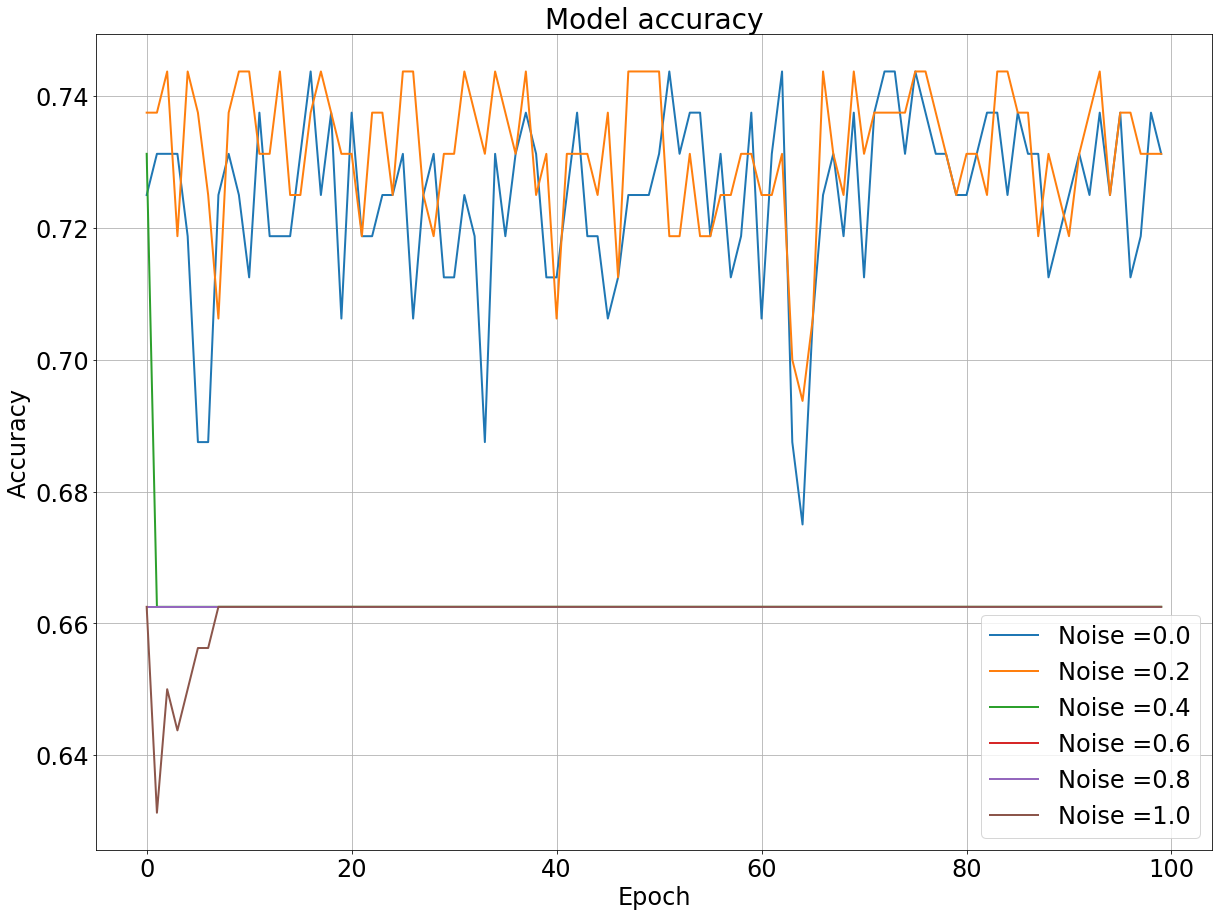

In [22]:
plt.figure(figsize=(20, 15))
i = 0
for history in histories:  
    plt.plot(history.history['acc'], label="Noise =" + str(noises[i]/ 100.0))
    i+= 1
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model accuracy')
plt.legend()
plt.grid()
plt.show()